In [61]:
#Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ppl
import scipy
%matplotlib inline
from patsy import dmatrix
import statsmodels.api as sm

import rpy2.robjects as robjects
# pip install rpy2

In [62]:
#Librerias de R
%load_ext rpy2.ipython 
#%reload_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [63]:
%%R
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("splines", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("stats", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("data.table", repos='http://cran.us.r-project.org', quiet=TRUE)

NULL


In [64]:
%%R
library('ggplot2')
library('splines')
library('stats')
library('data.table')

In [ ]:
#bd=pd.read_csv('Y:\IESS_2020\Data\SSC\FWid_ACT_SSC.txt',sep=';', header=0, 
#               dtype={'CEDULA_CONYUGE':'object','SEXO_CONY':'object', 'FECHA_MUERTE_CONY':'object',
#                      'FECHA_NACIMIENTO_CONY':'object'}) #existen 405.769 cedulas distintas en 2020

In [ ]:
#bd.groupby(['SEXO_AFI', 'EDAD_AFI'])['CEDULA_AFI'].count().unstack(0)

In [65]:
hijos=pd.read_csv('Y:\IESS_2020\Data\SSC\FWORPH_ACT_SSC.txt',sep=';', header=0,
                 dtype={'FECHA_NAC_HIJ':'object','SEXO_HIJ':'object', 'CED_AFILIADO':'object', 'CED_HIJO':'object',
                        'CEDULA_PADRE':'object', 'CEDULA_MADRE':'object'}) #existen 223824 cedulas distinctas de hijos en 2020
hijos

,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO
0,2012,1305074393,19/06/1951,M,61,NaN,1309280426,1303308025,1305074393,04/04/1994,H,18.0
1,2012,1301727465,01/02/1954,M,58,NaN,0918004920,1301727473,1301727465,28/12/1994,H,18.0
2,2013,1304286840,21/05/1961,M,52,NaN,1309630976,1303877615,1304286840,11/04/1995,M,18.0
3,2012,0502437262,20/06/1977,M,35,NaN,0502448046,1710208685,0502437262,08/12/1994,H,18.0
4,2012,0602097958,30/03/1965,M,47,NaN,0603380775,0602050767,0602097958,30/11/1995,H,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4776329,2020,1304318403,17/05/1963,H,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776330,2018,0901961219,21/01/1945,H,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776331,2019,0103122594,26/03/1970,H,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776332,2020,0901700682,25/03/1939,H,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#hijos=hijos[ hijos['EDAD_HIJO'].isnull()==False ]

In [67]:
# Hijos solo para el año 2020
hijos=hijos[hijos['ANIO']==2015]

In [68]:
# Se elimina los registros de afiliados muertos en el año de observación
hijos=hijos[hijos['FECHA_MUERTE_AFI'].isnull()==True]
hijos
#hijos['CED_AFILIADO'].nunique()

,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO
14,2015,1304002437,14/10/1961,M,54,NaN,1309942975,1302027105,1304002437,12/04/1997,H,18.0
16,2015,1308407640,25/09/1974,M,41,NaN,1309943411,1306210707,1308407640,16/04/1997,M,18.0
32,2015,1305725184,04/10/1967,M,48,NaN,1310338676,1307110302,1305725184,14/07/1997,H,18.0
45,2015,1717256885,25/01/1980,M,35,NaN,1717256844,0801988239,1717256885,12/06/1997,M,18.0
58,2015,0915907232,04/06/1976,M,39,NaN,0921465324,0907375026,0915907232,09/09/1997,H,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4776312,2015,0100649292,19/05/1948,H,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776319,2015,0911007565,23/02/1966,M,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776320,2015,0902176494,16/11/1940,H,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776325,2015,1301742704,29/08/1943,H,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hijos[hijos['SEXO_AFI']=='H']
#hijos[hijos['SEXO_AFI']=='H'][hijos['EDAD_HIJO'].isnull()==True]

In [ ]:
hijos['CED_AFILIADO'].nunique() #Número de jefes de familia  (2020/405.769)
#hijos['CED_HIJO'].nunique()   #Número de hijos (2020/219.859)

In [69]:
hijos['peso']=1
hijos

,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO,peso
14,2015,1304002437,14/10/1961,M,54,NaN,1309942975,1302027105,1304002437,12/04/1997,H,18.0,1
16,2015,1308407640,25/09/1974,M,41,NaN,1309943411,1306210707,1308407640,16/04/1997,M,18.0,1
32,2015,1305725184,04/10/1967,M,48,NaN,1310338676,1307110302,1305725184,14/07/1997,H,18.0,1
45,2015,1717256885,25/01/1980,M,35,NaN,1717256844,0801988239,1717256885,12/06/1997,M,18.0,1
58,2015,0915907232,04/06/1976,M,39,NaN,0921465324,0907375026,0915907232,09/09/1997,H,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776312,2015,0100649292,19/05/1948,H,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4776319,2015,0911007565,23/02/1966,M,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4776320,2015,0902176494,16/11/1940,H,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4776325,2015,1301742704,29/08/1943,H,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [70]:
hijos['padre']=np.nan
hijos['madre']=np.nan
for i in range(2012,2021):
    dict_f=hijos[ (hijos['SEXO_AFI']=='H') & ( hijos['ANIO']==i)].set_index('CEDULA_PADRE')['EDAD_AFI'].to_dict()
    hijos.loc[ (hijos['ANIO']==i) & (hijos['SEXO_AFI']=='H'), 'padre']=hijos[ (hijos['SEXO_AFI']=='H') & (hijos['ANIO']==i)]['CED_AFILIADO'].map(dict_f)
    dict_m=hijos[ (hijos['SEXO_AFI']=='M') & ( hijos['ANIO']==i)].set_index('CEDULA_MADRE')['EDAD_AFI'].to_dict()
    hijos.loc[ (hijos['ANIO']==i) & (hijos['SEXO_AFI']=='M'), 'madre']=hijos[ (hijos['SEXO_AFI']=='M') & (hijos['ANIO']==i)]['CED_AFILIADO'].map(dict_m)

hijos

,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO,peso,padre,madre
14,2015,1304002437,14/10/1961,M,54,NaN,1309942975,1302027105,1304002437,12/04/1997,H,18.0,1,NaN,54.0
16,2015,1308407640,25/09/1974,M,41,NaN,1309943411,1306210707,1308407640,16/04/1997,M,18.0,1,NaN,41.0
32,2015,1305725184,04/10/1967,M,48,NaN,1310338676,1307110302,1305725184,14/07/1997,H,18.0,1,NaN,48.0
45,2015,1717256885,25/01/1980,M,35,NaN,1717256844,0801988239,1717256885,12/06/1997,M,18.0,1,NaN,35.0
58,2015,0915907232,04/06/1976,M,39,NaN,0921465324,0907375026,0915907232,09/09/1997,H,18.0,1,NaN,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776312,2015,0100649292,19/05/1948,H,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4776319,2015,0911007565,23/02/1966,M,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4776320,2015,0902176494,16/11/1940,H,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4776325,2015,1301742704,29/08/1943,H,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [71]:
#Verificaciones para padres
hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='H'][hijos['padre'].isnull()==True] # 243 registros 
#hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='M'][hijos['madre'].isnull()==True] # 429 registros 

C:\Users\CRISTI~1.GUA\AppData\Local\Temp/ipykernel_8636/3961900794.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='H'][hijos['padre'].isnull()==True] # 243 registros


,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO,peso,padre,madre
49025,2015,1304509514,29/05/1962,H,53,NaN,0950289264,1205833039,1304509514,14/07/2009,H,6.0,1,NaN,NaN
54169,2015,1203184450,09/10/1972,H,43,NaN,1207699701,1202230361,1203184450,10/05/2000,H,15.0,1,NaN,NaN
104884,2015,0201221686,22/04/1969,H,46,NaN,1650065533,1600373292,0201221686,06/05/2011,H,4.0,1,NaN,NaN
110826,2015,1102015912,03/01/1959,H,56,NaN,0750606972,0301991188,1102015912,17/04/2013,M,2.0,1,NaN,NaN
123001,2015,0917683930,01/07/1978,H,37,NaN,0957527864,0801570060,0917683930,28/12/2007,M,8.0,1,NaN,NaN
186056,2015,0803505577,17/08/1985,H,30,NaN,2350715310,0803207653,0803505577,09/06/2007,H,8.0,1,NaN,NaN
186057,2015,0803505577,17/08/1985,H,30,NaN,2350715294,0803207653,0803505577,21/05/2006,H,9.0,1,NaN,NaN
186058,2015,0803505577,17/08/1985,H,30,NaN,0804717247,0803207653,0803505577,27/03/2012,M,3.0,1,NaN,NaN
206974,2015,1313299875,29/05/1979,H,36,NaN,1351643646,1313299883,1313299875,22/08/2005,M,10.0,1,NaN,NaN
206975,2015,1313299875,29/05/1979,H,36,NaN,1316607256,1313299883,1313299875,08/09/2000,H,15.0,1,NaN,NaN


In [72]:
#Correcciones de edad del afiliado por sexo
for i in range(2012,2021):
    dict_f=hijos[ (hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='H') & (hijos['ANIO']==i) & (hijos['padre'].isnull()==True)].set_index('CEDULA_MADRE')['EDAD_AFI'].to_dict()
    hijos.loc[(hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='H') & (hijos['ANIO']==i) & (hijos['padre'].isnull()==True), 'padre']=hijos[ (hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='H') & (hijos['ANIO']==i) & (hijos['padre'].isnull()==True)]['CED_AFILIADO'].map(dict_f)
    dict_m=hijos[ (hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M') & (hijos['ANIO']==i) & (hijos['madre'].isnull()==True)].set_index('CEDULA_PADRE')['EDAD_AFI'].to_dict()
    hijos.loc[(hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M') & (hijos['ANIO']==i) & (hijos['madre'].isnull()==True), 'madre']=hijos[ (hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M') & (hijos['ANIO']==i) & (hijos['madre'].isnull()==True)]['CED_AFILIADO'].map(dict_m)

In [73]:
#Verificaciones para padres segunda parte
hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='H'][hijos['padre'].isnull()==True] # 0 registros 
#hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='M'][hijos['madre'].isnull()==True] # 0 registros 

C:\Users\CRISTI~1.GUA\AppData\Local\Temp/ipykernel_8636/4119575258.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hijos[hijos['CED_HIJO'].isnull()==False][hijos['SEXO_AFI']=='H'][hijos['padre'].isnull()==True] # 0 registros


,ANIO,CED_AFILIADO,FECHA_NAC_AFI,SEXO_AFI,EDAD_AFI,FECHA_MUERTE_AFI,CED_HIJO,CEDULA_PADRE,CEDULA_MADRE,FECHA_NAC_HIJ,SEXO_HIJ,EDAD_HIJO,peso,padre,madre


In [ ]:
# Para un año en específico
a=pd.DataFrame( hijos[(hijos['CED_HIJO'].isnull()==False) & (hijos['ANIO']==2020)].groupby(['ANIO','SEXO_AFI','padre'])['CED_AFILIADO'].count().unstack(0).sum(1)['H']/hijos[hijos['ANIO']==2020].groupby(['ANIO','SEXO_AFI','EDAD_AFI'])['CED_AFILIADO'].count().unstack(0).sum(1)['H'])
a

In [ ]:
hijos[(hijos['SEXO_AFI']=='H')].groupby(['EDAD_HIJO', 'padre'])['CED_AFILIADO'].nunique().unstack(0)
#hijos[(hijos['SEXO_AFI']=='H')][hijos['EDAD_HIJO'].isnull()==True]['EDAD_AFI'].value_counts() # Valores nulos

In [ ]:
hijos[hijos['SEXO_AFI']=='H'].groupby(['ANIO','EDAD_AFI'])['CED_AFILIADO'].nunique().unstack(0).reindex(range(15,101))

In [74]:
#esp_p=hijos[hijos['CED_HIJO'].isnull()==False].groupby(['ANIO','SEXO_AFI','padre'])['CED_AFILIADO'].count().unstack(0).sum(1)['H']/hijos.groupby(['ANIO','SEXO_AFI','EDAD_AFI'])['CED_AFILIADO'].count().unstack(0).sum(1)['H']
esp_p=(hijos[ ( hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='H')].groupby(['ANIO','padre'])['CED_HIJO'].nunique().unstack(0).reindex(range(15,101))/hijos[hijos['SEXO_AFI']=='H'].groupby(['ANIO','EDAD_AFI'])['CED_AFILIADO'].nunique().unstack(0).reindex(range(15,101))).median(axis = 1, skipna = True)
esp_p

padre
15     1.000000
16     0.200000
17     0.458333
18     0.439024
19     0.411765
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

<AxesSubplot:xlabel='padre'>

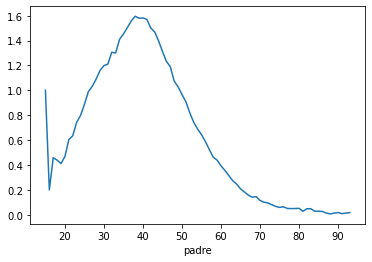

In [75]:
esp_p.plot()

In [76]:
esp_p=esp_p.rolling(window=5,center=True, min_periods=1).mean()
esp_p

padre
15     0.552778
16     0.524339
17     0.501824
18     0.395414
19     0.476188
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

<AxesSubplot:xlabel='padre'>

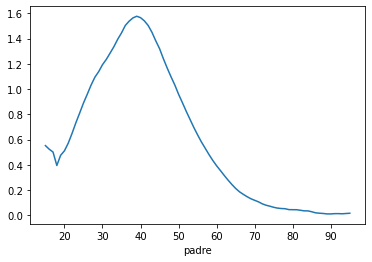

In [77]:
esp_p.plot()

In [ ]:
hijos[ ( hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M')].groupby(['ANIO','madre'])['CED_AFILIADO'].count().unstack(0).reindex(range(15,101))

In [ ]:
hijos[hijos['SEXO_AFI']=='M'].groupby(['ANIO','EDAD_AFI'])['CED_AFILIADO'].count().unstack(0).reindex(range(15,101))

In [78]:
esp_m=(hijos[ ( hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M')].groupby(['ANIO','madre'])['CED_HIJO'].nunique().unstack(0).reindex(range(15,101))/hijos[hijos['SEXO_AFI']=='M'].groupby(['ANIO','EDAD_AFI'])['CED_AFILIADO'].nunique().unstack(0).reindex(range(15,101))).median(axis = 1, skipna = True)
esp_m

madre
15     1.000000
16     0.600000
17     0.800000
18     0.820359
19     0.872549
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

<AxesSubplot:xlabel='madre'>

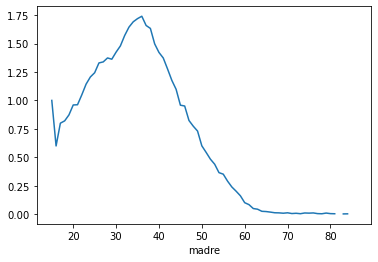

In [79]:
esp_m.plot()

In [80]:
esp_m=esp_m.rolling(5,center=True, min_periods=1).mean()
esp_m

madre
15     0.800000
16     0.805090
17     0.818582
18     0.810608
19     0.883027
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

<AxesSubplot:xlabel='madre'>

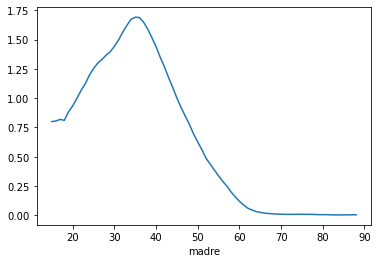

In [81]:
esp_m.plot()

In [82]:
hijos_papi=hijos[(hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='H')].groupby(['ANIO','padre', 'EDAD_HIJO'])['CED_HIJO'].nunique().unstack(0).median(axis = 1, skipna = True).unstack(1).reindex(range(15,101))
hijos_papi
#hijos_papi.sum().sum()

EDAD_HIJO,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
padre,,,,,,,,,,,,,,,,,,,
15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,31.0,34.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,95.0,55.0,20.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
m=((((hijos_papi*hijos_papi.columns)).sum(axis=1)/hijos_papi.sum(axis=1))/18)
m

padre
15     0.000000
16     0.055556
17     0.010101
18     0.039352
19     0.035556
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

In [84]:
s=(np.sqrt((hijos_papi*(hijos_papi.columns)**2).sum(axis=1)/hijos_papi.sum(axis=1)-((hijos_papi*(hijos_papi.columns)).sum(axis=1)/hijos_papi.sum(axis=1))**2)/18)
s

padre
15     0.000000
16     0.055556
17     0.021427
18     0.041859
19     0.046825
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

In [85]:
def basic(x,a):
    return a
def logagrowth(x,a,b,c):
    return np.exp(np.log(c+x)-np.log(a+(b*x)))
def exp_logagrowht(x,a,b):
    return a+(b*x)
def trinomio(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
def cuadrado(x,a,b,c):
    return a+b*x+c*x**2
def polinomio4(x,a,b,c,d,e):
    return a+b*x+c*x**2+d*x**3+e*x**4
def polinomio5(x,a,b,c,d,e, f):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5
def approximacion_basic(serie,a_inf,a_sup,sample):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(basic,xdata=range(a_inf,a_sup+1),ydata=serie_df.loc[a_inf:a_sup]['serie'],
                          sigma=serie_df.loc[a_inf:a_sup]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(basic,args=([test[0]]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_logagrowth(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(logagrowth,xdata=range(a_inf1,a_sup1+1),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                          sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(logagrowth,args=(test[0],test[1],test[2]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]<1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)
    
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_e_logagrowth(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(exp_logagrowht,xdata=range(a_inf1,a_sup1+1),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                          sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(exp_logagrowht,args=(test[0],test[1]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=1-(serie_df['smooth'].loc[i]>1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)

    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_trinomio(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(trinomio,xdata=pd.Series(range(a_inf1,a_sup1+1)),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                                  sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(trinomio,args=(test[0],test[1],test[2],test[3]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)  
        
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_cuadrado(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(cuadrado,xdata=pd.Series(range(a_inf1,a_sup1+1)),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                          sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(cuadrado,args=(test[0],test[1],test[2]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=1-(serie_df['smooth'].loc[i]>1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)

    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_polinomio4(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(polinomio4,xdata=pd.Series(range(a_inf1,a_sup1+1)),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                          sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(polinomio4,args=(test[0],test[1],test[2],test[3],test[4]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=1-(serie_df['smooth'].loc[i]>1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)

    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_polinomio5(serie,a_inf,a_sup,sample, a_inf1,a_sup1):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(polinomio5,xdata=pd.Series(range(a_inf1,a_sup1+1)),ydata=serie_df.loc[a_inf1:a_sup1]['serie'],
                          sigma=serie_df.loc[a_inf1:a_sup1]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(polinomio5,args=(test[0],test[1],test[2],test[3],test[4], test[5]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=1-(serie_df['smooth'].loc[i]>1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)

    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


padre
15     0.043736
16     0.064272
17     0.084808
18     0.105345
19     0.125881
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Name: smooth, Length: 86, dtype: float64

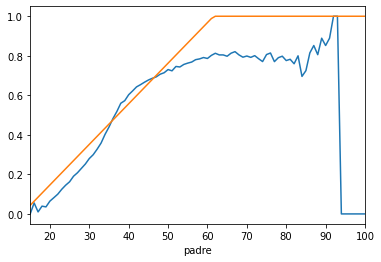

In [86]:
#%reload_ext rpy2.ipython
m_hijos_p=approximacion_curvas_e_logagrowth(m.fillna(0),a_inf=15,a_sup=100,sample=hijos_papi.sum(axis=1).reindex(range(15,101)).fillna(0),a_inf1=15, a_sup1=55)['smooth']
#m_hijos_p=m_hijos_p.reset_index()
m_hijos_p

In [ ]:
"""%%R -i m_hijos_p
b <- as.data.table(m_hijos_p)
proy <- data.table( age = 15:100 )
#plot(b$age, b$serie)
ud_smooth_model <- lm(  serie ~ bs( age, df= 4, degree = 3    #5 y 4
                                       , knots = c( 40.5)  #76.5
                                       ), 
                          weights = sigma,
                          data = b[age>=18  & age<=75] )  #37 y 90
summary(ud_smooth_model)
proy[ , smooth_bs := predict( object = ud_smooth_model, 
                                  newdata = proy ) ]
plot(b$age, b$serie);points(proy$age, proy$smooth_bs, col="red", type = "l")
plot(proy$age, proy$smooth_bs, col="red")
m_hijos_p1 <- cbind( ind=seq(15,100),merge( m_hijos_p, proy, by=c('age'), all.x=T))
col_name <- colnames(m_hijos_p1)"""

In [ ]:
""""%reload_ext rpy2.ipython
m_hijos_p=pd.DataFrame( robjects.r['m_hijos_p1']).transpose()
m_hijos_p.columns = robjects.r['col_name']
m_hijos_p=m_hijos_p.set_index('padre').drop(['ind'], axis=1)
m_hijos_p"""

In [ ]:
#m_hijos_p.plot(x='age', y=['serie','smooth_bs', 'smooth'])

In [ ]:
#aux=pd.DataFrame(m_hijos_p).reset_index()
#a=5
#b=3
#noot=(18,100)
#x=np.array( aux['padre'])
#y=np.array( aux['serie'])
#sy=np.array( aux['smooth'])
#transformed_x=dmatrix("bs(x, df=a, degree=b, knots=noot,include_intercept=False)", {"x": x},return_type='dataframe')
#fit=sm.GLM(y,transformed_x).fit()
#aux['pred'] = fit.predict(dmatrix("bs(x, df=a,degree=b, knots=noot,include_intercept=False)", {"x": x}, return_type='dataframe'))
#ppl.plot(aux['age'],aux['pred'],color='g', label='Natural spline')
#ppl.plot(aux['age'],aux['serie'], color='r')
#ppl.plot(aux['age'],aux['smooth'], color='r')
#aux

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


padre
15     0.036729
16     0.039596
17     0.042463
18     0.045330
19     0.048197
         ...   
96     0.268965
97     0.271833
98     0.274700
99     0.277567
100    0.280434
Name: smooth, Length: 86, dtype: float64

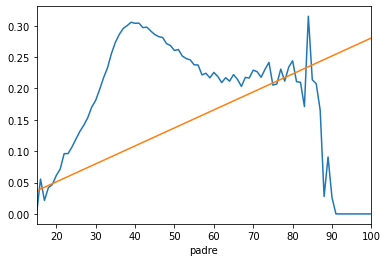

In [87]:
s_hijos_p=approximacion_curvas_e_logagrowth(s.fillna(0),a_inf=15,a_sup=100,sample=hijos_papi.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=75, a_sup1=85)['smooth']
#s_hijos_p=s_hijos_p.reset_index()
s_hijos_p

C:\Users\CRISTI~1.GUA\AppData\Local\Temp/ipykernel_8636/3642829450.py:4: RuntimeWarning: invalid value encountered in log
  return np.exp(np.log(c+x)-np.log(a+(b*x)))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


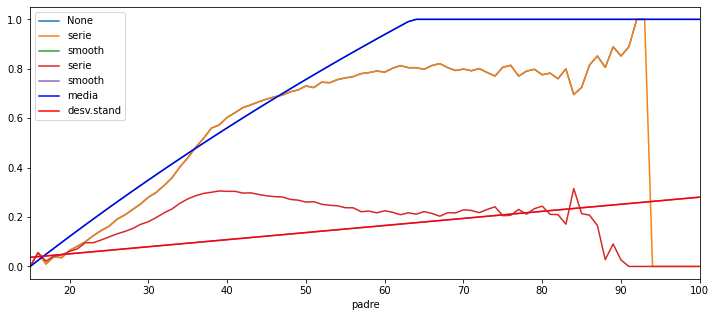

In [88]:
ppl.figure(figsize=(12,5))
ppl.xlabel('Edad padre')
m.plot()

m_hijos_p=approximacion_curvas_logagrowth(m.fillna(0),a_inf=15,a_sup=100,sample=hijos_papi.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=15, a_sup1=55)['smooth']
s_hijos_p=approximacion_curvas_e_logagrowth(s.fillna(0),a_inf=15,a_sup=100,sample=hijos_papi.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=75, a_sup1=85)['smooth']


ax1 =m_hijos_p.plot(color='blue',label='media')
ax2 =s_hijos_p.plot(color='red',label='desv.stand')

ax1.legend(loc=1)
ax2.legend(loc=2)

ppl.show()

In [89]:
alpha_hijos_p=((1-m_hijos_p)/(s_hijos_p**2)-1/m_hijos_p)*m_hijos_p**2
alpha_hijos_p

padre
15    -4.712261e-09
16     3.536318e-01
17     1.223065e+00
18     2.354267e+00
19     3.590722e+00
           ...     
96    -1.000000e+00
97    -1.000000e+00
98    -1.000000e+00
99    -1.000000e+00
100   -1.000000e+00
Name: smooth, Length: 86, dtype: float64

<AxesSubplot:xlabel='padre'>

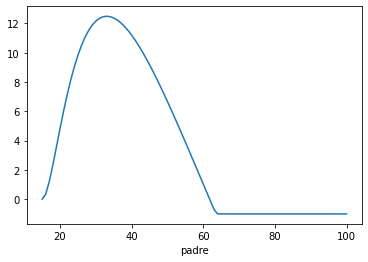

In [90]:
alpha_hijos_p.plot()

In [91]:
beta_hijos_p=alpha_hijos_p*(1/m_hijos_p-1)
beta_hijos_p

padre
15     -0.999997
16     13.986994
17     23.678687
18     29.732901
19     33.264382
         ...    
96     -0.000000
97     -0.000000
98     -0.000000
99     -0.000000
100    -0.000000
Name: smooth, Length: 86, dtype: float64

<AxesSubplot:xlabel='padre'>

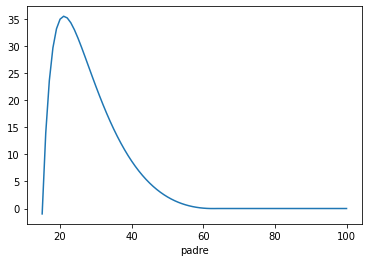

In [92]:
beta_hijos_p.plot()

In [93]:
children=scipy.stats.beta(alpha_hijos_p,beta_hijos_p,0,19)

<AxesSubplot:>

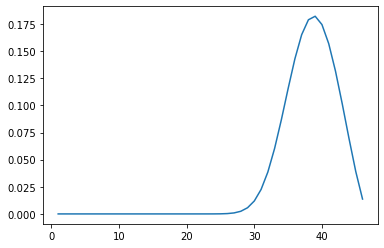

In [94]:
pd.Series(scipy.stats.beta(alpha_hijos_p,beta_hijos_p,0,19).cdf(18)-scipy.stats.beta(alpha_hijos_p,beta_hijos_p,0,19).cdf(17)).plot()

<AxesSubplot:>

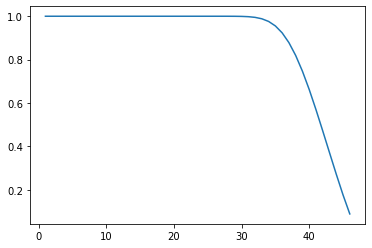

In [95]:
pd.Series(scipy.stats.beta(alpha_hijos_p,beta_hijos_p,0,19).cdf(18)).plot()

In [96]:
hijos_dist=pd.DataFrame(columns=range(0,20))
for c in hijos_dist.columns:
    hijos_dist[c]=pd.Series(children.cdf(c+1)-children.cdf(c),index=range(15,101)).fillna(0)

In [97]:
hijos_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
16,0.849116,0.100095,0.032810,0.011667,0.004172,0.001452,0.000482,0.000150,0.000043,1.098460e-05,2.470361e-06,4.696831e-07,7.191630e-08,8.263953e-09,6.392307e-10,2.777634e-11,4.847234e-13,1.665335e-15,0.0,0.0
17,0.640558,0.256233,0.076857,0.020324,0.004800,0.001008,0.000186,0.000030,0.000004,4.384443e-07,3.784413e-08,2.422972e-09,1.063103e-10,2.846834e-12,3.896883e-14,2.220446e-16,0.000000e+00,0.000000e+00,0.0,0.0
18,0.383813,0.405284,0.157449,0.042577,0.009057,0.001569,0.000222,0.000026,0.000002,1.613247e-07,8.172909e-09,2.818719e-10,6.005529e-12,6.861178e-14,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
19,0.175557,0.444293,0.266555,0.088851,0.020615,0.003593,0.000482,0.000050,0.000004,2.200793e-07,8.673111e-09,2.201851e-10,3.236633e-12,2.342571e-14,1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [98]:
h_male=hijos_dist.mul(esp_p*2.4,axis=0).fillna(0)
h_male

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
16,1.068540,0.125961,0.041289,0.014681,0.005250,0.001828,0.000607,0.000188,0.000054,1.382318e-05,3.108739e-06,5.910561e-07,9.050053e-08,1.039948e-08,8.044172e-10,3.495415e-11,6.099830e-13,2.095681e-15,0.0,0.0
17,0.771474,0.308602,0.092565,0.024478,0.005781,0.001214,0.000224,0.000036,0.000005,5.280530e-07,4.557866e-08,2.918176e-09,1.280379e-10,3.428666e-12,4.693323e-14,2.674258e-16,0.000000e+00,0.000000e+00,0.0,0.0
18,0.364237,0.384612,0.149419,0.040406,0.008595,0.001489,0.000211,0.000024,0.000002,1.530962e-07,7.756043e-09,2.674947e-10,5.699212e-12,6.511218e-14,2.107190e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
19,0.200636,0.507761,0.304633,0.101544,0.023559,0.004106,0.000551,0.000057,0.000004,2.515180e-07,9.912079e-09,2.516389e-10,3.698991e-12,2.677211e-14,1.268820e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


(0.0, 20.0)

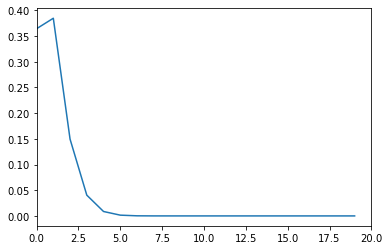

In [99]:
h_male.transpose()[18].plot().set_xlim(0,20)

<AxesSubplot:>

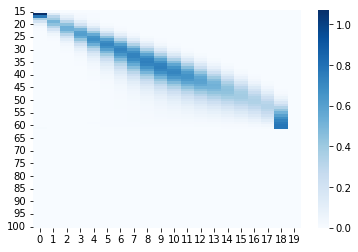

In [100]:
sns.heatmap(h_male,cmap='Blues')

In [101]:
h_male.sum()

0     2.529981
1     2.462673
2     3.312249
3     4.329048
4     5.400980
5     6.438917
6     7.368953
7     8.107815
8     8.561933
9     8.659513
10    8.385523
11    7.790935
12    6.973696
13    6.047516
14    5.115599
15    4.258196
16    3.537610
17    3.042796
18    6.206108
19    0.000000
dtype: float64

In [102]:
h_male.reindex(range(0,106)).reindex(columns=range(0,106)).fillna(0).to_csv('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Family Structure/ssc_forph_male_input.csv', sep="\t",
             decimal= ".")
#wid_m.to_excel('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Transition Probabilities/ssc_fwid_male.xlsx')

In [103]:
hijos_madre=hijos[(hijos['CED_HIJO'].isnull()==False) & (hijos['SEXO_AFI']=='M')].groupby(['ANIO','madre', 'EDAD_HIJO'])['CED_HIJO'].nunique().unstack(0).median(axis = 1, skipna = True).unstack(1).reindex(range(15,101)).fillna(0)
hijos_madre

EDAD_HIJO,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
madre,,,,,,,,,,,,,,,,,,,
15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,8.0,11.0,9.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,36.0,44.0,28.0,20.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19,72.0,95.0,66.0,67.0,44.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
m=((((hijos_madre*hijos_madre.columns)).sum(axis=1)/hijos_madre.sum(axis=1))/18)
m

madre
15     0.000000
16     0.043210
17     0.072917
18     0.083942
19     0.103933
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Length: 86, dtype: float64

In [105]:
s=(np.sqrt((hijos_madre*(hijos_madre.columns)**2).sum(axis=1)/hijos_madre.sum(axis=1)-((hijos_madre*(hijos_madre.columns)).sum(axis=1)/hijos_madre.sum(axis=1))**2)/18).fillna(0)
s

madre
15     0.000000
16     0.050903
17     0.057998
18     0.089585
19     0.080209
         ...   
96     0.000000
97     0.000000
98     0.000000
99     0.000000
100    0.000000
Length: 86, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


madre
15     0.345459
16     0.358643
17     0.371827
18     0.385011
19     0.398196
         ...   
96     1.000000
97     1.000000
98     1.000000
99     1.000000
100    1.000000
Name: smooth, Length: 86, dtype: float64

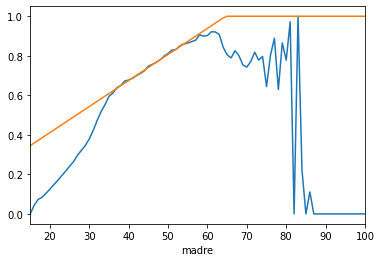

In [106]:
m_hijos_m=approximacion_curvas_e_logagrowth(m.fillna(0),a_inf=15,a_sup=100,sample=hijos_madre.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=40, a_sup1=60)['smooth']
#m_hijos_m=m_hijos_m.reset_index()
m_hijos_m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


madre
15     0.246684
16     0.247346
17     0.248009
18     0.248671
19     0.249334
         ...   
96     0.300342
97     0.301005
98     0.301667
99     0.302330
100    0.302992
Name: smooth, Length: 86, dtype: float64

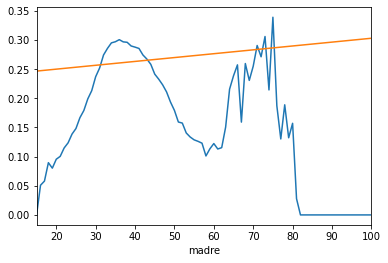

In [107]:
s_hijos_m=approximacion_curvas_e_logagrowth(s.fillna(0),a_inf=15,a_sup=100,sample=hijos_madre.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=15, a_sup1=60)['smooth']
#s_hijos_m=s_hijos_m.reset_index()
s_hijos_m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


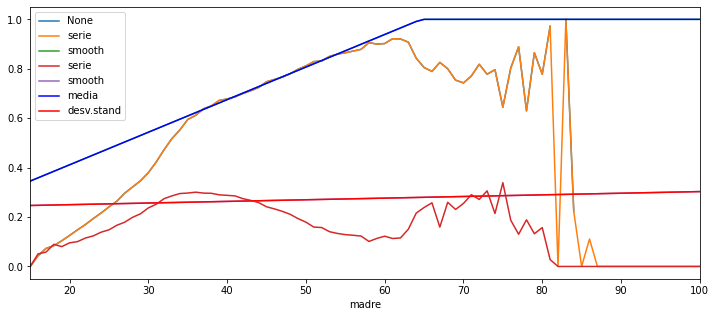

In [108]:
ppl.figure(figsize=(12,5))
ppl.xlabel('Edad padre')
m.plot()

m_hijos_m=approximacion_curvas_e_logagrowth(m.fillna(0),a_inf=15,a_sup=100,sample=hijos_madre.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=40, a_sup1=60)['smooth']
s_hijos_m=approximacion_curvas_e_logagrowth(s.fillna(0),a_inf=15,a_sup=100,sample=hijos_madre.sum(axis=1).reindex(range(15,101)).fillna(0), a_inf1=15, a_sup1=60)['smooth']


ax1 =m_hijos_m.plot(color='blue',label='media')
ax2 =s_hijos_m.plot(color='red',label='desv.stand')

ax1.legend(loc=1)
ax2.legend(loc=2)

ppl.show()

In [109]:
alpha_hijos_m=((1-m_hijos_m)/(s_hijos_m**2)-1/m_hijos_m)*m_hijos_m**2
alpha_hijos_m

madre
15     0.938198
16     0.989743
17     1.040150
18     1.089212
19     1.136727
         ...   
96    -1.000000
97    -1.000000
98    -1.000000
99    -1.000000
100   -1.000000
Name: smooth, Length: 86, dtype: float64

<AxesSubplot:xlabel='madre'>

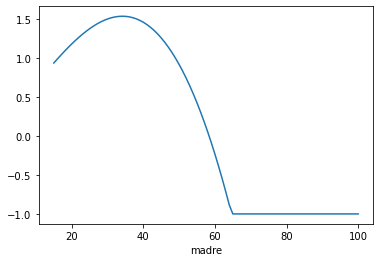

In [110]:
alpha_hijos_m.plot()

In [111]:
beta_hijos_m=alpha_hijos_m*(1/m_hijos_m-1)
beta_hijos_m

madre
15     1.777601
16     1.769943
17     1.757250
18     1.739826
19     1.717968
         ...   
96    -0.000000
97    -0.000000
98    -0.000000
99    -0.000000
100   -0.000000
Name: smooth, Length: 86, dtype: float64

<AxesSubplot:xlabel='madre'>

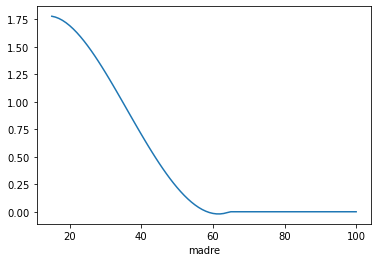

In [112]:
beta_hijos_m.plot()

In [113]:
children=scipy.stats.beta(alpha_hijos_m,beta_hijos_m,0,19)

<AxesSubplot:>

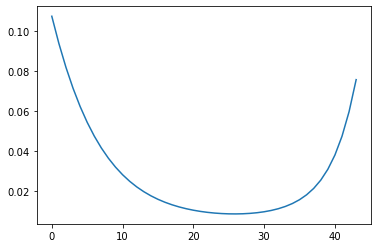

In [114]:
pd.Series(scipy.stats.beta(alpha_hijos_m,beta_hijos_m,0,19).cdf(1)-scipy.stats.beta(alpha_hijos_m,beta_hijos_m,0,19).cdf(0)).plot()

In [115]:
hijos_dist=pd.DataFrame(columns=range(0,20))
for c in hijos_dist.columns:
    hijos_dist[c]=pd.Series(children.cdf(c+1)-children.cdf(c),index=range(15,101)).fillna(0)

In [116]:
hijos_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
15,0.107214,0.094020,0.086948,0.081097,0.075804,0.070819,0.066017,0.061326,0.056696,0.052091,0.047479,0.042833,0.038124,0.033319,0.028376,0.023238,0.017809,0.011903,0.004886,0.0
16,0.093677,0.088475,0.084102,0.079870,0.075675,0.071476,0.067248,0.062973,0.058637,0.054225,0.049723,0.045111,0.040369,0.035466,0.030363,0.024998,0.019269,0.012968,0.005377,0.0
17,0.081785,0.082866,0.080938,0.078256,0.075161,0.071780,0.068173,0.064370,0.060388,0.056230,0.051895,0.047374,0.042649,0.037695,0.032470,0.026908,0.020895,0.014194,0.005974,0.0
18,0.071376,0.077290,0.077531,0.076305,0.074288,0.071740,0.068789,0.065505,0.061930,0.058083,0.053974,0.049600,0.044948,0.039993,0.034691,0.028969,0.022696,0.015598,0.006696,0.0
19,0.062296,0.071826,0.073953,0.074068,0.073086,0.071369,0.069096,0.066368,0.063246,0.059762,0.055935,0.051766,0.047245,0.042345,0.037017,0.031180,0.024681,0.017197,0.007563,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<AxesSubplot:>

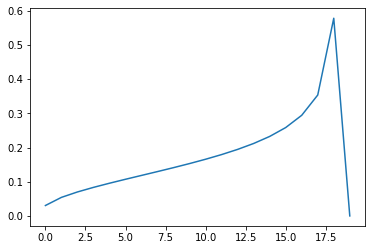

In [117]:
h_female=hijos_dist.mul(esp_m*2.4,axis=0).fillna(0)
h_female.transpose()[40].plot()

(0.0, 20.0)

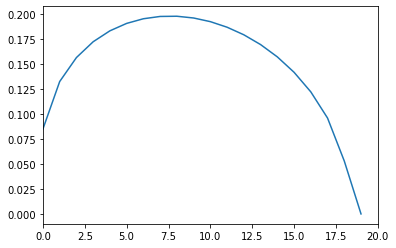

In [118]:
h_female.transpose()[25].plot().set_xlim(0,20)

<AxesSubplot:>

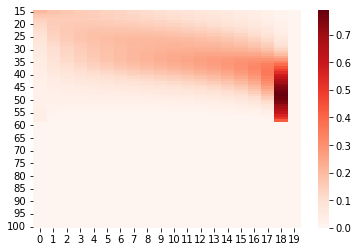

In [119]:
sns.heatmap(h_female,cmap='Reds')

In [120]:
h_female.sum()

0      2.667304
1      3.441481
2      3.943667
3      4.316260
4      4.612826
5      4.857389
6      5.063326
7      5.239146
8      5.390862
9      5.523189
10     5.640311
11     5.746546
12     5.847187
13     5.949943
14     6.068046
15     6.228280
16     6.497410
17     7.112531
18    16.576860
19     0.000000
dtype: float64

In [121]:
h_female.reindex(range(0,106)).reindex(columns=range(0,106)).fillna(0).to_csv('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Family Structure/ssc_forph_female_input.csv', sep="\t",
             decimal= ".")
#wid_m.to_excel('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Transition Probabilities/ssc_fwid_male.xlsx')